# Day 27 - Polynomial Regression


# Polynomial Regression


## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Bad Fit

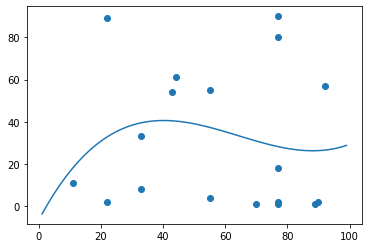

In [13]:
x = [89,43,22,55,77,33,22,11,77,55,33,70,77,77,44,90,92,77] # Lists
y = [1,54,2,4,2,8,89,11,80,55,33,1,18,90,61,2,57,1]

myModel = np.poly1d(np.polyfit(x,y,3)) #Degree is nth-exponent of variable X in Equation.
myLine = np.linspace(1,99,100)

plt.scatter(x,y)
plt.plot(myLine,myModel(myLine))
plt.show()

## Calculating R2 score 

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y,myModel(x))) # Not a good score

0.035152510477986176


## Good fit

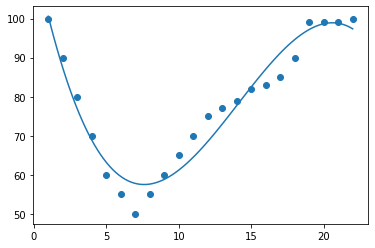

In [20]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22] # Lists
y = [100,90,80,70,60,55,50,55,60,65,70,75,77,79,82,83,85,90,99,99,99,100]


myModel = np.poly1d(np.polyfit(x,y,3)) #Degree is nth-exponent of variable X in Equation.
myLine = np.linspace(1,22,100)

plt.scatter(x,y)
plt.plot(myLine,myModel(myLine))
plt.show()

In [21]:
from sklearn.metrics import r2_score
print(r2_score(y,myModel(x))) # good score

0.9435018424360582


## Prediction

In [24]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22] # Lists
y = [100,90,80,70,60,55,50,55,60,65,70,75,77,79,82,83,85,90,99,99,99,100]


myModel = np.poly1d(np.polyfit(x,y,3)) #Degree is nth-exponent of variable X in Equation.
myLine = np.linspace(1,22,100)

y_pred = myModel(26)
print(y_pred)

71.49693304407253


## Hands on Practice on Amazon salary data

In [30]:
# Importing the dataset
dataset = pd.read_csv(
    "https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv"
)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset.head()
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

## Linear Regression vs Polynomial Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

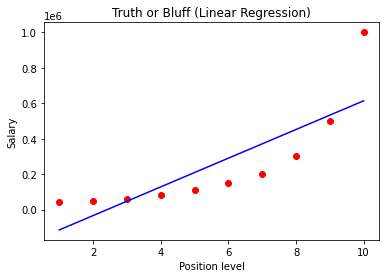

In [31]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color="red")
    plt.plot(X, lin_reg.predict(X), color="blue")
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel("Position level")
    plt.ylabel("Salary")
    plt.show()
    return
viz_linear()

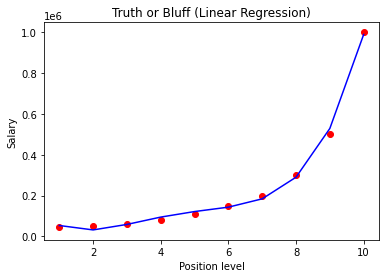

In [32]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
 
 
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color="red")
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color="blue")
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel("Position level")
    plt.ylabel("Salary")
    plt.show()
    return
viz_polymonial()

## Predicting a new result with Linear Regression

In [39]:
 # Predicting a new result with Linear Regression
pred_linear = lin_reg.predict([[11]])
print(pred_linear)

[694333.33333333]


## Predicting a new result with Polymonial Regression

In [40]:
 # Predicting a new result with Polymonial Regression
pred_polynomial = pol_reg.predict(poly_reg.fit_transform([[11]]))
print(pred_polynomial)

[1780833.33333359]


## Difference between Linear and Polynomial Prediction

In [42]:
print("Difference between Salaries predicted for same experience:" ,pred_polynomial - pred_linear)

Difference between Salaries predicted for same experience: [1086500.00000025]
